In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

## Importing required libraries

In [2]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Load the data using pandas

In [3]:
df = pd.read_csv("iplauction2023 (1).csv")
df.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


### Data preparation and Cleaning
#### Look at the information about the data and columns
#### Fix any missing or incorrect values

In [4]:
df.shape

(309, 7)

In [5]:
df.describe()

,base price (in lacs),final price (in lacs)
count,151.000000,238.000000
mean,59.205298,368.067227
std,59.688337,449.070117
min,20.000000,20.000000
25%,20.000000,21.250000
50%,20.000000,150.000000
75%,75.000000,625.000000
max,200.000000,1850.000000


#### Check for null values or missing data

In [6]:
df.isnull().sum()

name                       0
player style               0
nationality                0
base price (in lacs)     158
final price (in lacs)     71
franchise                 71
status                     0
dtype: int64

#### As per above analysis, there are null values in base price (in lacs), final price (in lacs) and franchise columns

In [7]:
df1 = df["base price (in lacs)"]
df1

0        NaN
1       20.0
2       75.0
3      150.0
4      100.0
       ...  
304      NaN
305      NaN
306      NaN
307      NaN
308      NaN
Name: base price (in lacs), Length: 309, dtype: float64

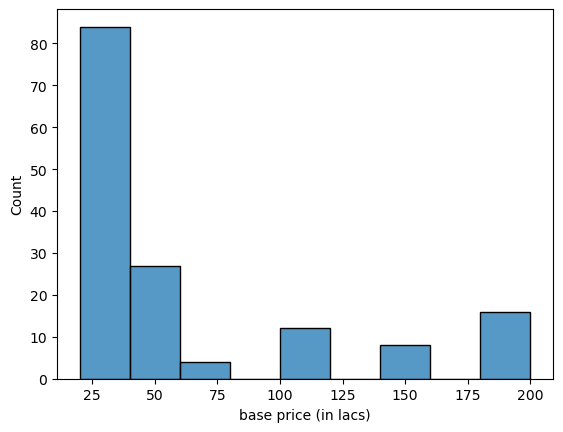

In [8]:
sns.histplot(df1)
plt.show()

In [9]:
df1.iloc[185]

nan

In [10]:
df[df['base price (in lacs)'].isna()]

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
152,Rajat Patidar,Batter,India,NaN,20.0,RCB,RETAINED
153,Matheesha Pathirana,Bowler,Sri Lanka,NaN,20.0,CSK,RETAINED
154,Tristan Stubbs,WK-Batter,South Africa,NaN,20.0,MI,RETAINED
155,Ravi Bishnoi,Bowler,India,NaN,400.0,LSG,RETAINED
...,...,...,...,...,...,...,...
304,MS Dhoni,WK-Batter,India,NaN,1200.0,CSK,RETAINED
305,Moeen Ali,Allrounder,England,NaN,800.0,CSK,RETAINED
306,Ruturaj Gaikwad,Batter,India,NaN,600.0,CSK,RETAINED
307,Rishabh Pant,WK-Batter,India,NaN,1600.0,DC,RETAINED


#### Finding mean and median for base price (in lacs), final price (in lacs) and franchise columns

In [11]:
baseprice_mean = df["base price (in lacs)"].mean()
baseprice_median = df["base price (in lacs)"].median()
baseprice_mean, baseprice_median

(59.205298013245034, 20.0)

#### Filling NaN values with zero

In [12]:
df['base price (in lacs)'] = df['base price (in lacs)'].fillna(0)
df['final price (in lacs)'] = df['final price (in lacs)'].fillna(0)

In [13]:
df.franchise.head(10)

0    KKR
1    NaN
2    NaN
3    KKR
4     RR
5     RR
6    NaN
7    SRH
8     MI
9    LSG
Name: franchise, dtype: object

#### franchise Nan means, player is unsold hence replacing NaN with unsold

In [14]:
df['franchise'] = df['franchise'].fillna("Unsold")

In [15]:
df.isnull().sum()

name                     0
player style             0
nationality              0
base price (in lacs)     0
final price (in lacs)    0
franchise                0
status                   0
dtype: int64

#### Exploring and Visualizing data

In [16]:
df["player style"].value_counts()

Bowler        111
Allrounder    103
Batter         55
WK-Batter      40
Name: player style, dtype: int64

In [17]:
df["nationality"].value_counts()

India           201
England          24
South Africa     19
West Indies      14
Australia        14
New Zealand      11
Sri Lanka         8
Afghanistan       7
Bangladesh        4
Ireland           2
Zimbabwe          2
Namibia           1
Netherlands       1
Singapore         1
Name: nationality, dtype: int64

#### Players Style distribution

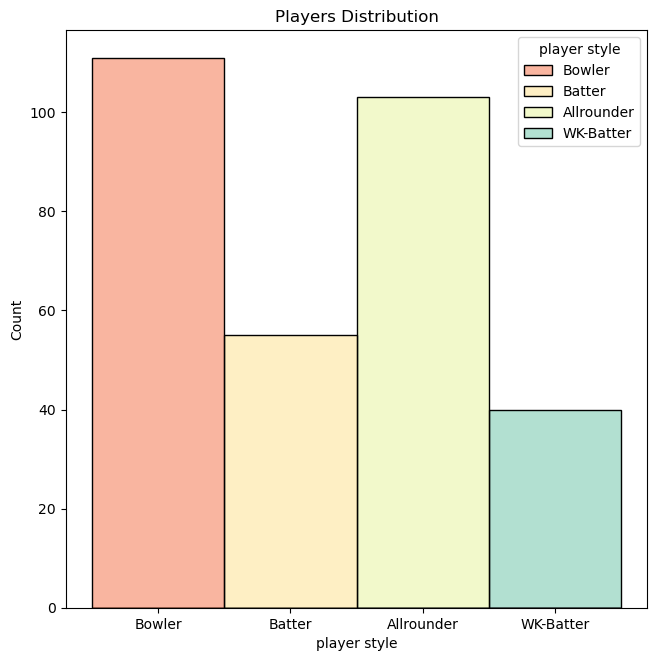

In [18]:
plt.figure(figsize=(7.5,7.5))
sns.histplot(df ,x='player style' ,hue = 'player style',palette='Spectral')
plt.title("Players Distribution")
plt.show()

#### Players Nationality Distribution

In [19]:
nationality_counts = df['nationality'].value_counts()
nationality_counts

India           201
England          24
South Africa     19
West Indies      14
Australia        14
New Zealand      11
Sri Lanka         8
Afghanistan       7
Bangladesh        4
Ireland           2
Zimbabwe          2
Namibia           1
Netherlands       1
Singapore         1
Name: nationality, dtype: int64

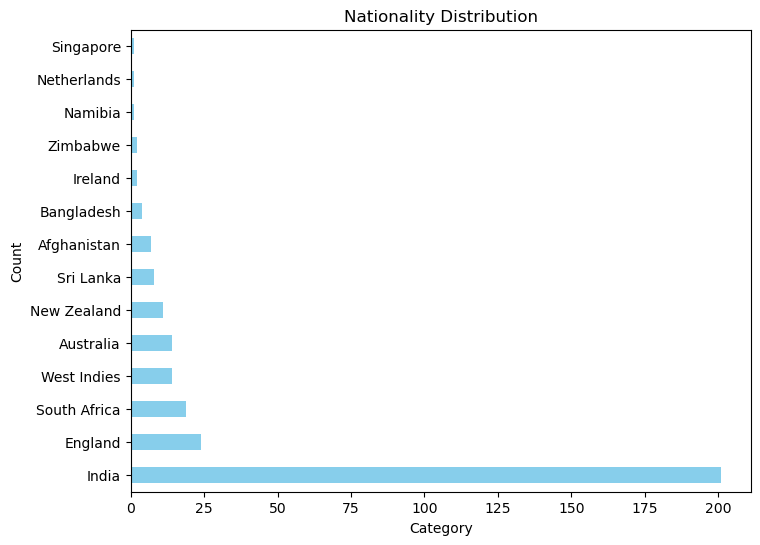

In [20]:
nationality_counts.plot(kind='barh', figsize=(8, 6), color='skyblue')

plt.title('Nationality Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

#### Sold and Unsold Players

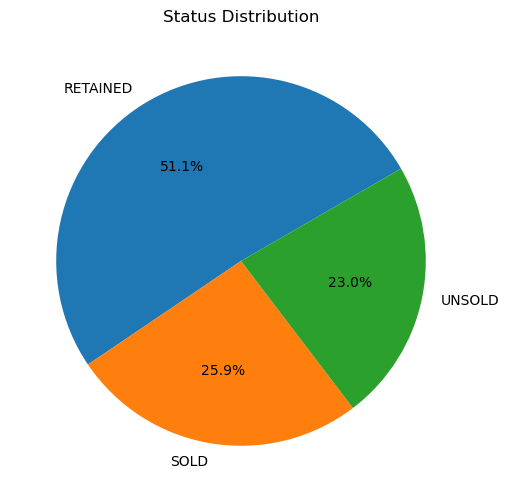

In [21]:
status_counts = df['status'].value_counts()

status_counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6), startangle=30)

# Show the plot
plt.ylabel('')  # Remove y-label for better appearance
plt.title('Status Distribution')  # Optional: Add a title
plt.show()

#### Top 5 players with highest bid

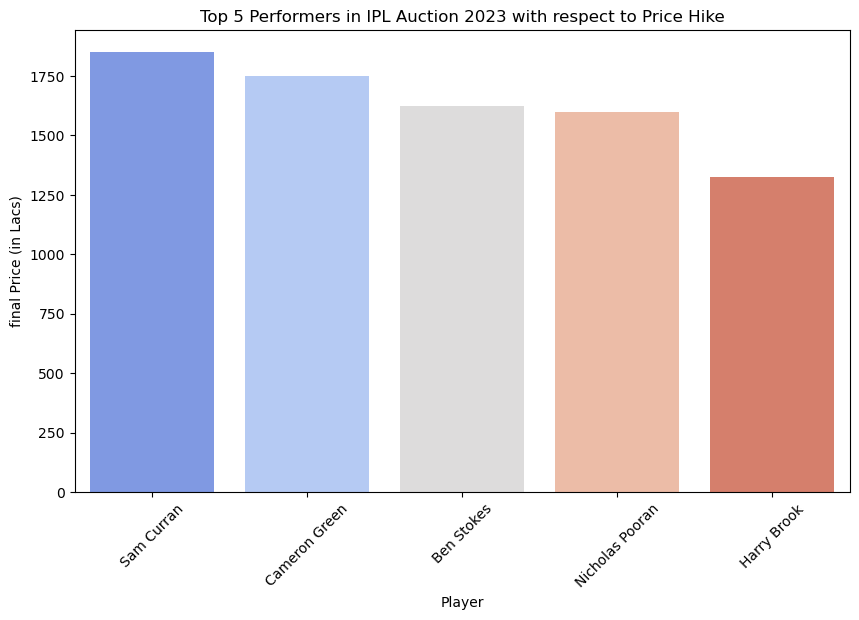

In [22]:
sold_players = df[df['status'] == 'SOLD']

top_5_players = sold_players.sort_values(by='final price (in lacs)', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='final price (in lacs)', data=top_5_players, palette='coolwarm')
plt.title('Top 5 Performers in IPL Auction 2023 with respect to Price Hike')
plt.xlabel('Player')
plt.ylabel('final Price (in Lacs)')
plt.xticks(rotation=45)  # Rotate the player names for better readability
plt.show()

#### The Top Performers (who exceeded expectations)

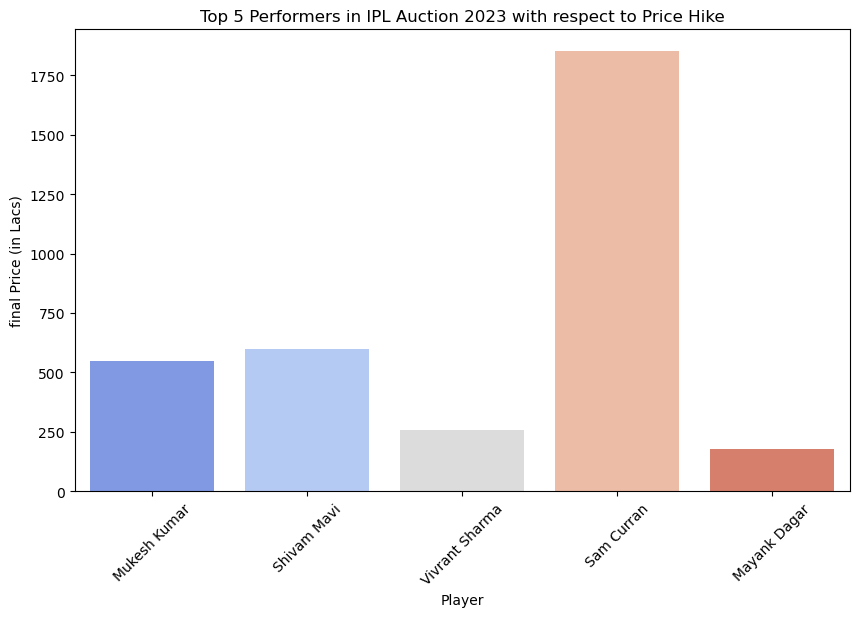

In [23]:
df['Price Ratio'] = df['final price (in lacs)'] / df['base price (in lacs)']

sold_players=df[df['status'] == 'SOLD']

top_5_performers = sold_players.sort_values(by='Price Ratio', ascending=False).head(5)

# Plotting the data using Seaborn

plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='final price (in lacs)', data=top_5_performers, palette='coolwarm')
plt.title('Top 5 Performers in IPL Auction 2023 with respect to Price Hike')
plt.xlabel('Player')
plt.ylabel('final Price (in Lacs)')
plt.xticks(rotation=45)  # Rotate the player names for better readability
plt.show()

#### Highest Paid Retained Players

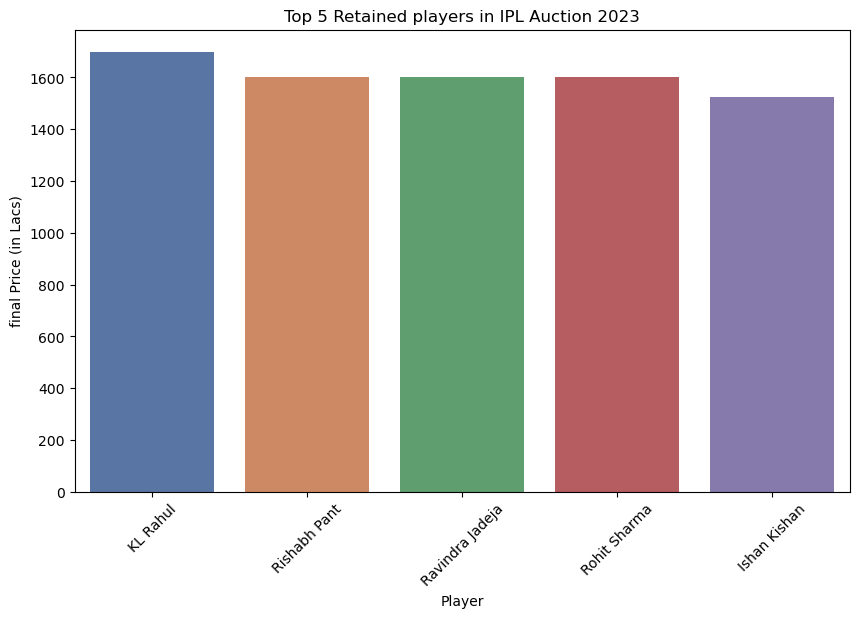

In [24]:
retained_players = df[df['status'] == 'RETAINED']

top_5_retainedPlayers = retained_players.sort_values(by='final price (in lacs)', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='final price (in lacs)', data=top_5_retainedPlayers, palette='deep')
plt.title('Top 5 Retained players in IPL Auction 2023')
plt.xlabel('Player')
plt.ylabel('final Price (in Lacs)')
plt.xticks(rotation=45)  # Rotate the player names for better readability
plt.show()

#### Highest Paid Unsold Players

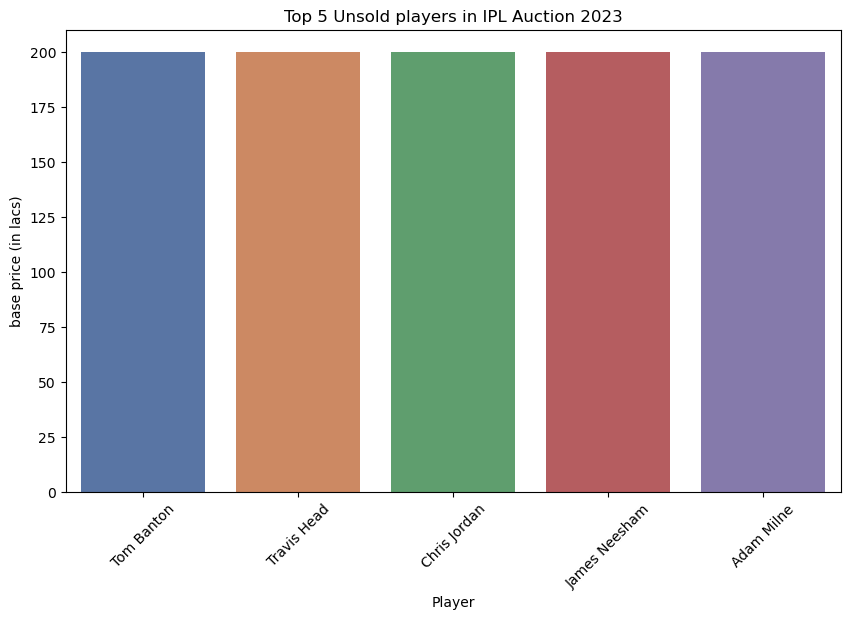

In [25]:
unsold_players = df[df['status'] == 'UNSOLD']

top_5_unsoldplayers = unsold_players.sort_values(by='base price (in lacs)', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='base price (in lacs)', data=top_5_unsoldplayers, palette='deep')
plt.title('Top 5 Unsold players in IPL Auction 2023')
plt.xlabel('Player')
plt.ylabel('base price (in lacs)')
plt.xticks(rotation=45)  # Rotate the player names for better readability
plt.show()

#### Franchise wise distribution

In [26]:
df.franchise.unique()

array(['KKR', 'Unsold', 'RR', 'SRH', 'MI', 'LSG', 'DC', 'PBKS', 'CSK',
       'RCB', 'GT'], dtype=object)

Example - RCB

In [27]:
df_RCB = df[df['franchise'] == 'RCB']
df_RCB.shape

(25, 8)

#### Status Distribution for RCB

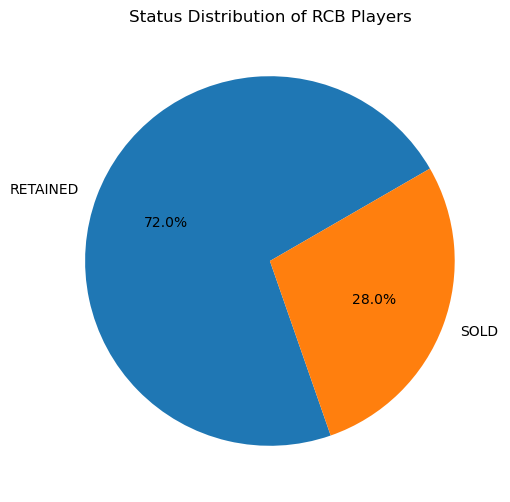

In [28]:
status_RCB_counts = df_RCB['status'].value_counts()

status_RCB_counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6), startangle=30)

# Show the plot
plt.ylabel('')  # Remove y-label for better appearance
plt.title('Status Distribution of RCB Players')  # Optional: Add a title
plt.show()

#### Nationalities Distribution for RCB

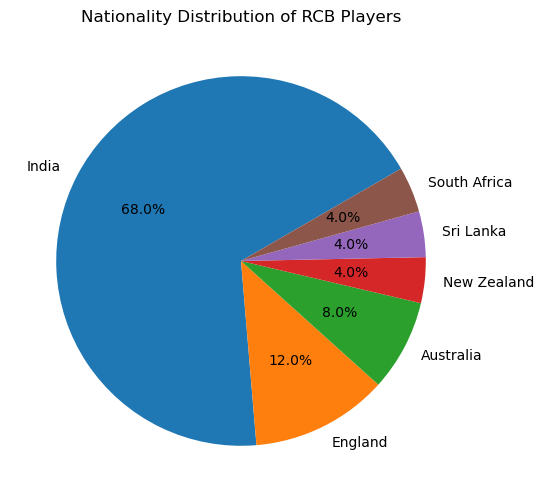

In [29]:
nationality_RCB_counts = df_RCB['nationality'].value_counts()

nationality_RCB_counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6), startangle=30)

# Show the plot
plt.ylabel('')  # Remove y-label for better appearance
plt.title('Nationality Distribution of RCB Players')  # Optional: Add a title
plt.show()

#### Final Prices of RCB

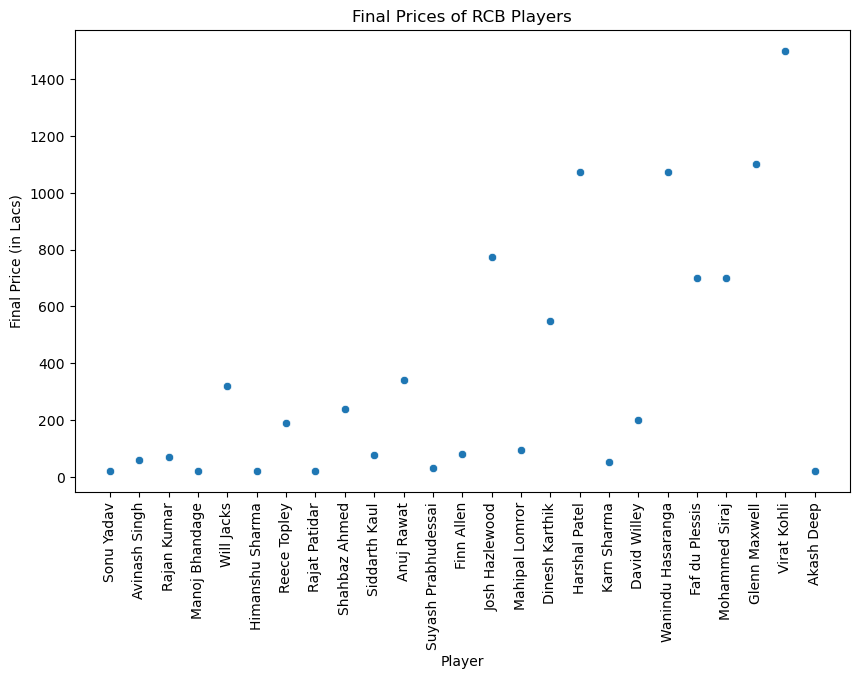

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='name', y='final price (in lacs)', data=df_RCB)
plt.title('Final Prices of RCB Players')
plt.xlabel('Player')
plt.ylabel('Final Price (in Lacs)')
plt.xticks(rotation=90)  # Rotate player names for better readability
plt.show()